In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')


In [4]:
weather_df = pd.read_csv(r'C:\Users\ashok\OneDrive\Desktop\Project 2\weather.csv')
weather_df.head()

,country,capital,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,Afghanistan,Kabul,1966-03-02,winter,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Kabul,1966-03-28,spring,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Kabul,1966-05-02,spring,18.8,NaN,22.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Kabul,1966-05-04,spring,19.7,NaN,27.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Kabul,1966-05-18,spring,24.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
weather_df.shape

(5001395, 14)

<Axes: >

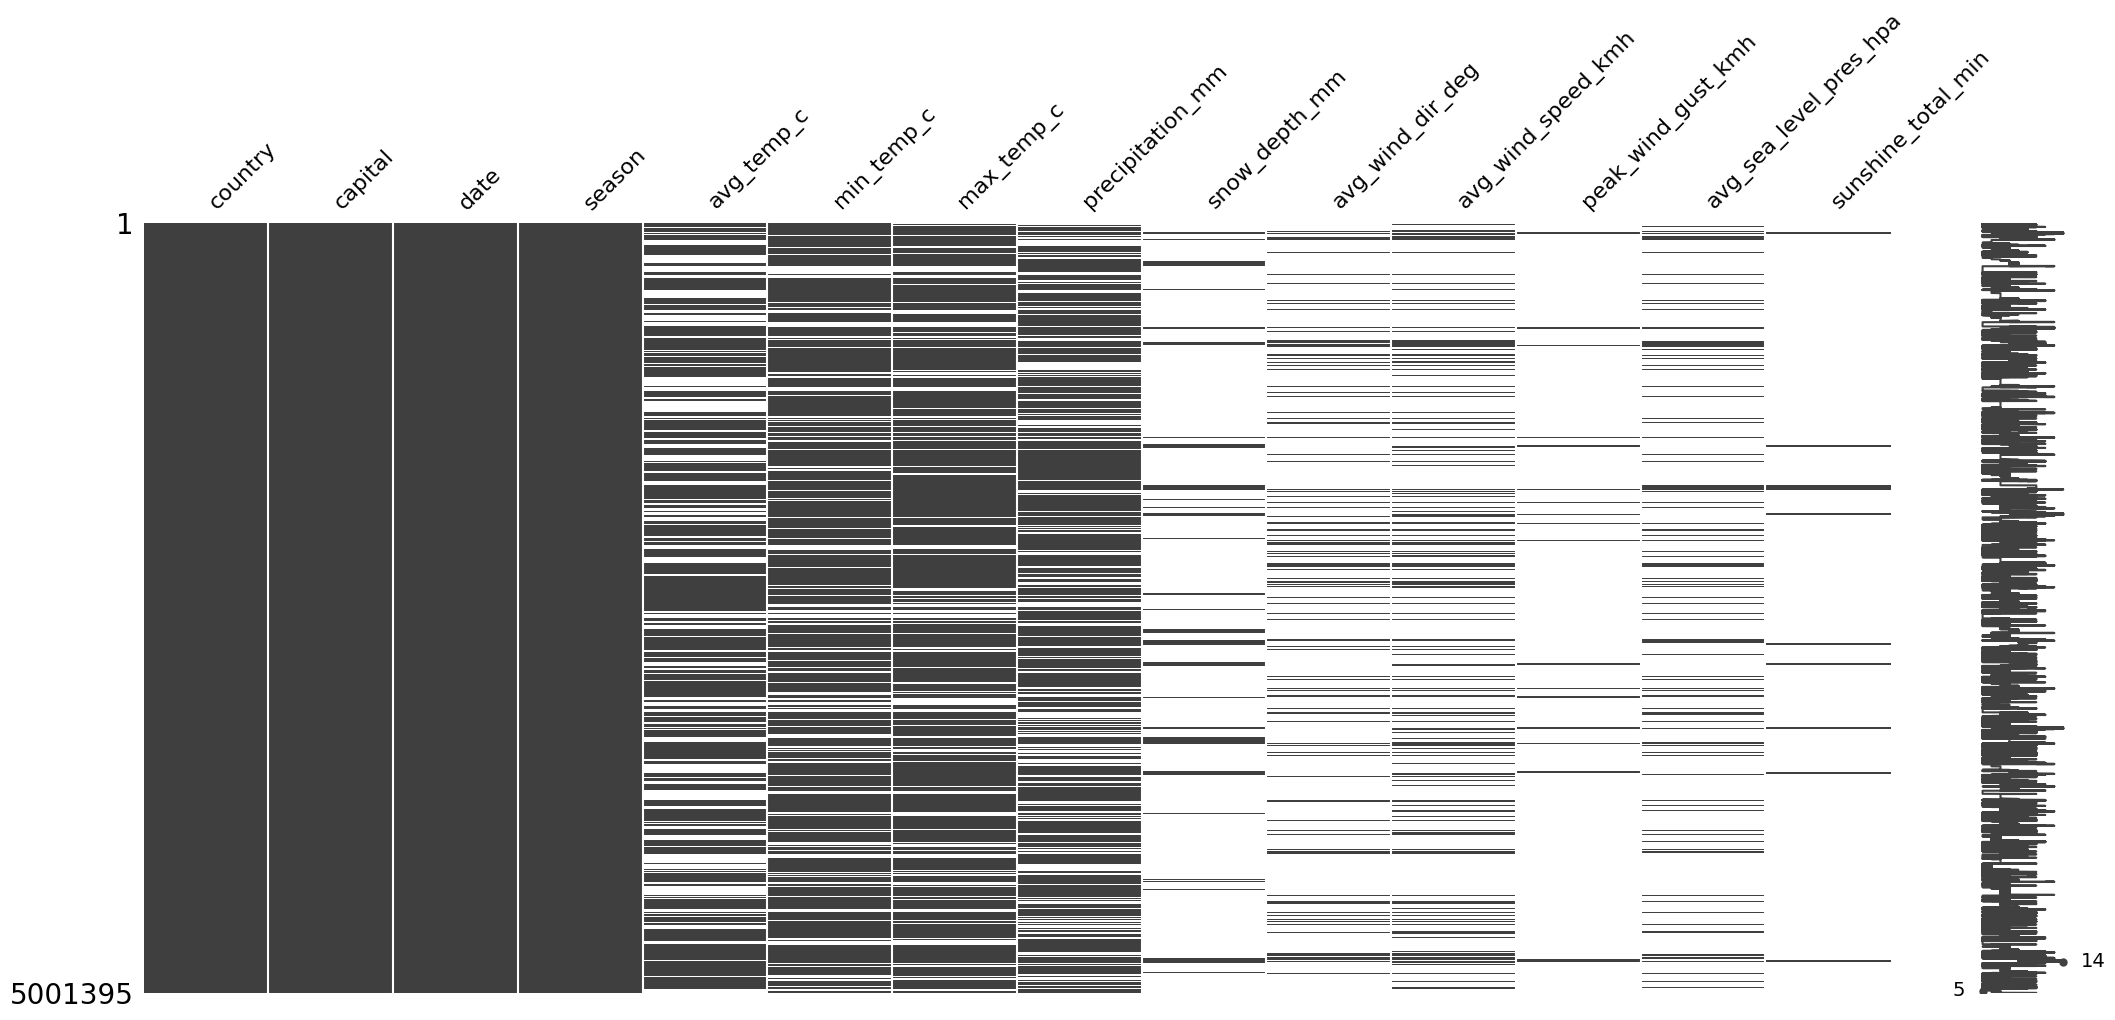

In [6]:
msno.matrix(weather_df)

In [7]:
weather_df.describe()

,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
count,3.326442e+06,4.011860e+06,4.013753e+06,3.616424e+06,432748.000000,729351.000000,1.103036e+06,187266.000000,727513.000000,145398.000000
mean,1.787318e+01,1.233485e+01,2.133458e+01,3.188509e+00,149.956478,170.711517,1.308016e+01,38.630100,1014.017030,335.196626
std,1.100738e+01,1.055083e+01,1.142508e+01,1.214030e+01,635.920375,107.549258,7.316977e+00,24.401852,7.718091,237.143064
min,-4.780000e+01,-5.160000e+01,-3.920000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,907.400000,0.000000
25%,1.090000e+01,5.000000e+00,1.370000e+01,0.000000e+00,0.000000,77.000000,7.900000e+00,27.700000,1009.900000,108.000000
50%,2.080000e+01,1.310000e+01,2.390000e+01,0.000000e+00,0.000000,167.000000,1.140000e+01,35.300000,1013.400000,343.000000
75%,2.680000e+01,2.200000e+01,3.040000e+01,1.600000e+00,20.000000,264.000000,1.660000e+01,44.000000,1018.200000,534.000000
max,4.360000e+01,3.900000e+01,6.000000e+01,9.999000e+02,8160.000000,360.000000,1.055000e+02,439.200000,1373.000000,984.000000


In [8]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001395 entries, 0 to 5001394
Data columns (total 14 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   country                 object        
 1   capital                 object        
 2   date                    datetime64[ns]
 3   season                  object        
 4   avg_temp_c              float64       
 5   min_temp_c              float64       
 6   max_temp_c              float64       
 7   precipitation_mm        float64       
 8   snow_depth_mm           float64       
 9   avg_wind_dir_deg        float64       
 10  avg_wind_speed_kmh      float64       
 11  peak_wind_gust_kmh      float64       
 12  avg_sea_level_pres_hpa  float64       
 13  sunshine_total_min      float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 534.2+ MB


In [9]:
weather_df.columns

Index(['country', 'capital', 'date', 'season', 'avg_temp_c', 'min_temp_c',
       'max_temp_c', 'precipitation_mm', 'snow_depth_mm', 'avg_wind_dir_deg',
       'avg_wind_speed_kmh', 'peak_wind_gust_kmh', 'avg_sea_level_pres_hpa',
       'sunshine_total_min'],
      dtype='object')

In [10]:
weather_df['month'] = weather_df['date'].dt.month
weather_df['year'] = weather_df['date'].dt.year
weather_df['month'] = weather_df['date'].dt.strftime('%B')

In [11]:
print(f"Total amount of countries: {weather_df['country'].nunique()}")
print(f"Total amount of seasons: {weather_df['season'].nunique()}") #Looks like seasons data is not correct
print(f"Start date: {weather_df['date'].min()}")
print(f"End date: {weather_df['date'].max()}")
#count median temp for 1966 and 2023. to satisfly curiosity:
print(f"Median temperature in 1966: {weather_df[weather_df['date'].dt.year == 1966]['avg_temp_c'].median()}")
print(f"Median temperature in 2023: {weather_df[weather_df['date'].dt.year == 2023]['avg_temp_c'].median()}")

Total amount of countries: 230
Total amount of seasons: 4
Start date: 1833-01-02 00:00:00
End date: 2023-08-14 00:00:00
Median temperature in 1966: 16.8
Median temperature in 2023: 23.3


In [12]:
weather_df.head()

,country,capital,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min,month,year
0,Afghanistan,Kabul,1966-03-02,winter,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March,1966
1,Afghanistan,Kabul,1966-03-28,spring,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March,1966
2,Afghanistan,Kabul,1966-05-02,spring,18.8,NaN,22.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,1966
3,Afghanistan,Kabul,1966-05-04,spring,19.7,NaN,27.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,1966
4,Afghanistan,Kabul,1966-05-18,spring,24.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,1966


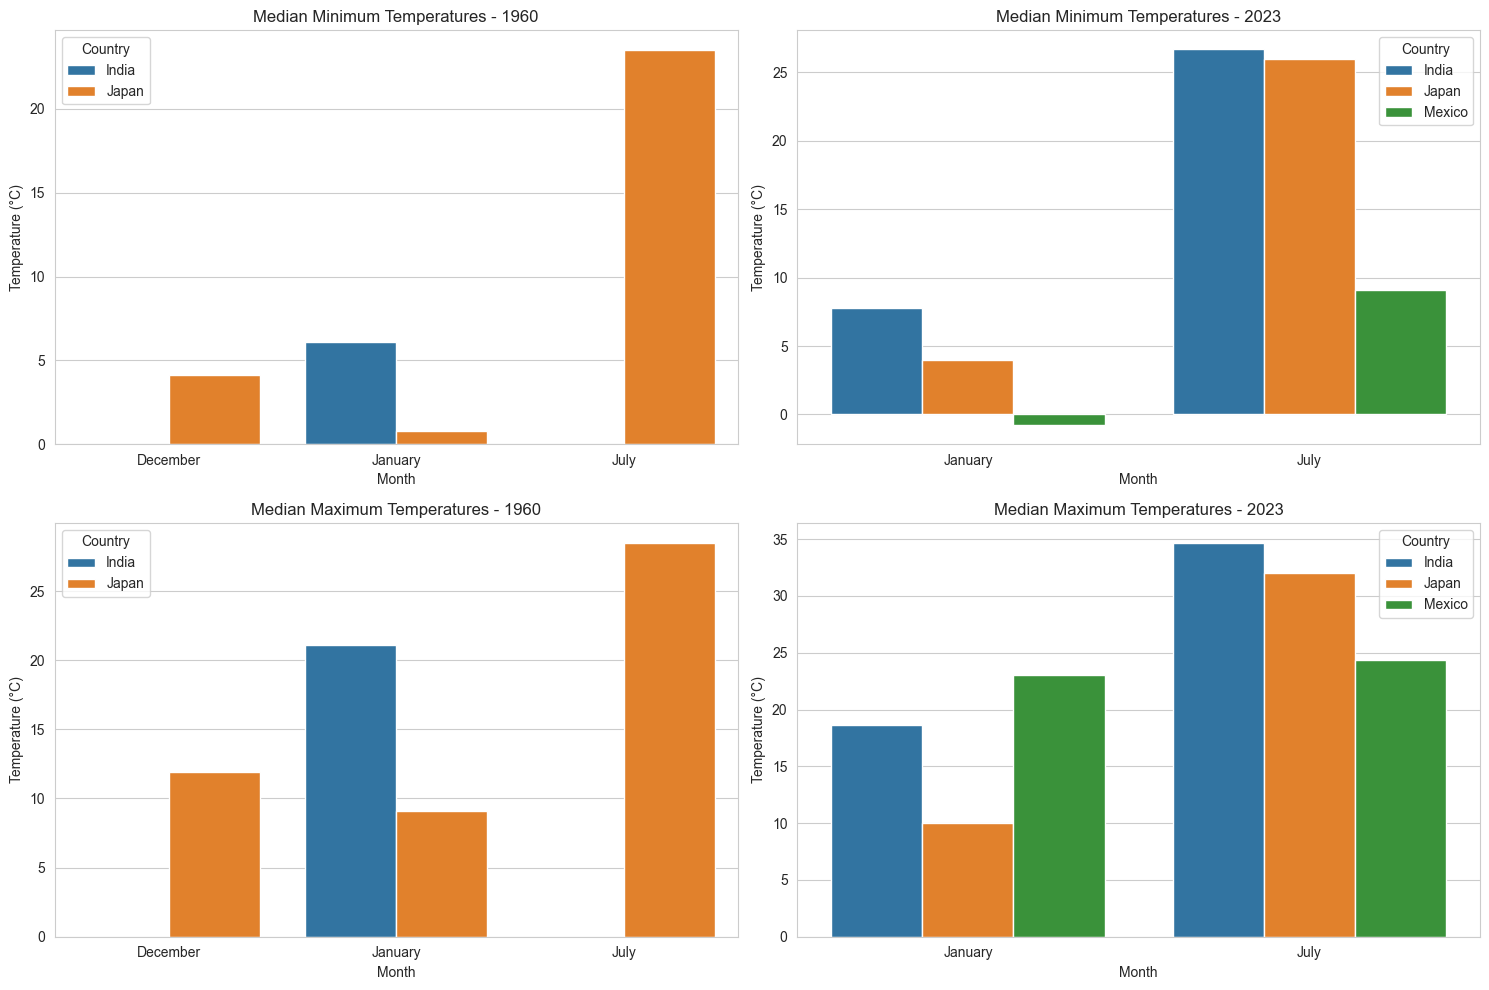

In [13]:
sns.set_style("whitegrid")

selected_countries = ['India', 'Mexico', 'Japan']
selected_months = ['January', 'December', 'July']
selected_years = [1960, 2023]
selected_countries_df = weather_df[
    (weather_df['country'].isin(selected_countries)) &
    (weather_df['year'].isin(selected_years)) &
    (weather_df['month'].isin(selected_months))
]

grouped_data = selected_countries_df.groupby(['year', 'country', 'month']).median()[['min_temp_c', 'max_temp_c']].reset_index()

# create a 2x2 grid for the subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# create separate plots for 1960 and 2023 for min and max temperatures
for i, year in enumerate(selected_years):
    year_data = grouped_data[grouped_data['year'] == year]
    
    # plot median minimum temperatures
    sns.barplot(data=year_data, x='month', y='min_temp_c', hue='country', ax=axs[0, i])
    axs[0, i].set_title(f'Median Minimum Temperatures - {year}')
    axs[0, i].set_xlabel('Month')
    axs[0, i].set_ylabel('Temperature (°C)')
    axs[0, i].legend(title='Country')
    
    # plot median maximum temperatures
    sns.barplot(data=year_data, x='month', y='max_temp_c', hue='country', ax=axs[1, i])
    axs[1, i].set_title(f'Median Maximum Temperatures - {year}')
    axs[1, i].set_xlabel('Month')
    axs[1, i].set_ylabel('Temperature (°C)')
    axs[1, i].legend(title='Country')

plt.tight_layout()
plt.show()

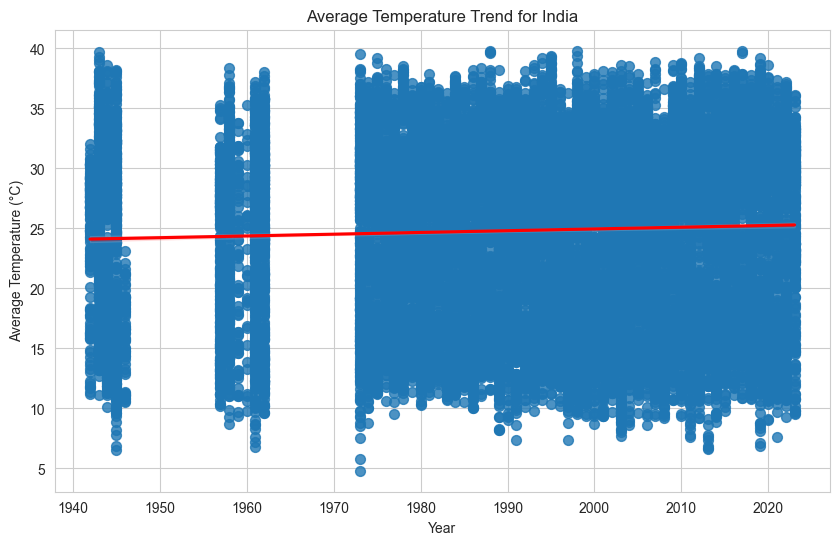

In [14]:
sns.set_style("whitegrid")

selected_countries = ['India']
weather_df_selected = weather_df[weather_df['country'].isin(selected_countries)]

# create the line plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(data=weather_df_selected, x='year', y='avg_temp_c', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Average Temperature Trend for India')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()

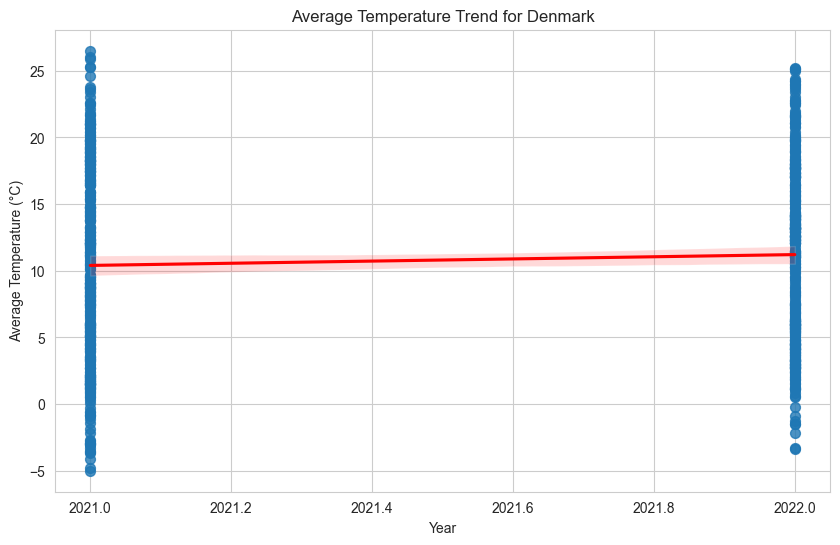

In [15]:
sns.set_style("whitegrid")

selected_countries = ['Denmark']
weather_df_selected = weather_df[weather_df['country'].isin(selected_countries)]

# create the line plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(data=weather_df_selected, x='year', y='avg_temp_c', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Average Temperature Trend for Denmark')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()

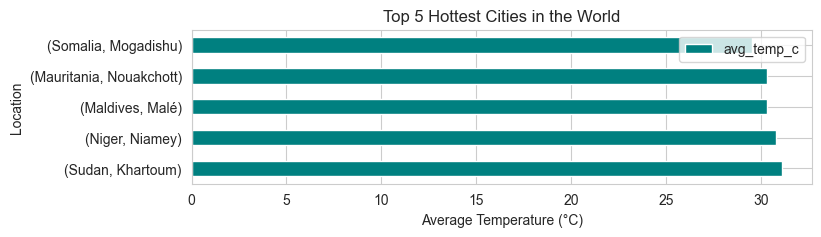

In [16]:
weather_df.groupby(['country','capital']).median()[['avg_temp_c']].sort_values('avg_temp_c', ascending = False).head().plot(kind='barh', color = 'teal', grid = True, figsize = (8,2))
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Location')
plt.title('Top 5 Hottest Cities in the World')
plt.show()